# CA1 for B9DA101 Group C
## Members -  
* Anish Rao: 20066423
* Sharath Chandra Chavali: 20058721
* Adithya Durgapu: 20054683
* Shruthi Ravi: 20068068      

## Setup

In [14]:

library(ggplot2)
data("diamonds")
str(diamonds)
cat(rep("-", 80), sep="")
summary(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...
--------------------------------------------------------------------------------

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

## QUESTION 1

### a) Describe the dataset using appropriate plots/curves/charts,…

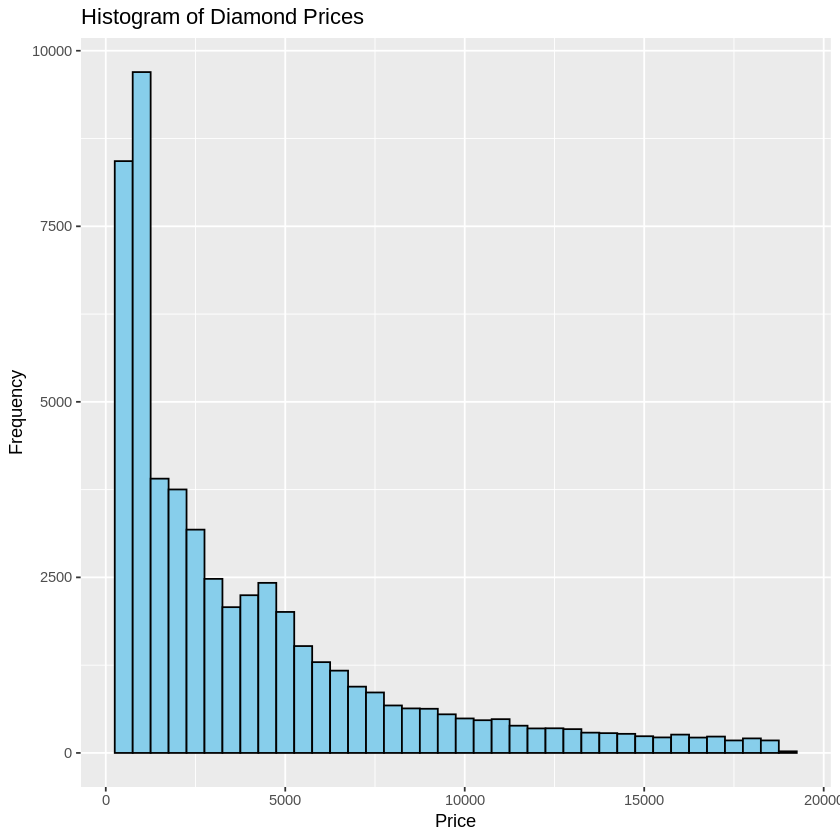

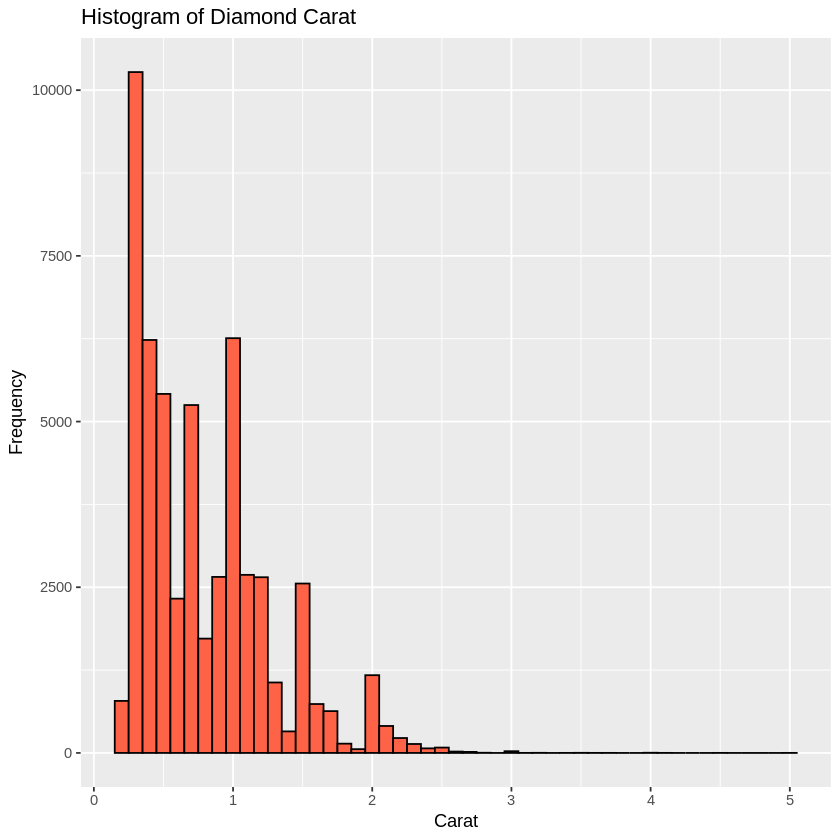

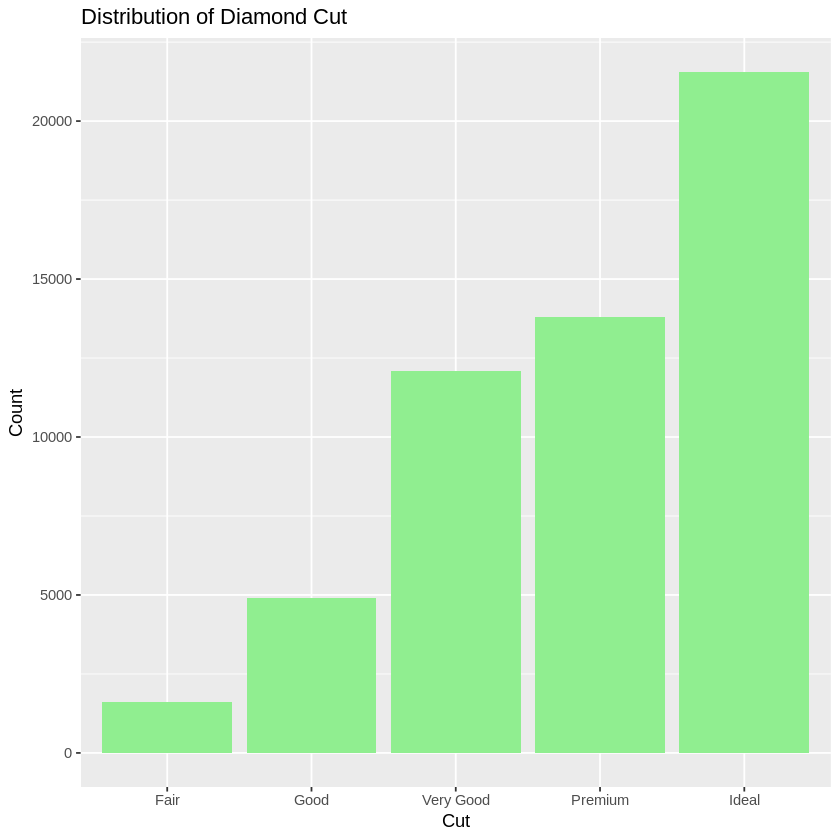

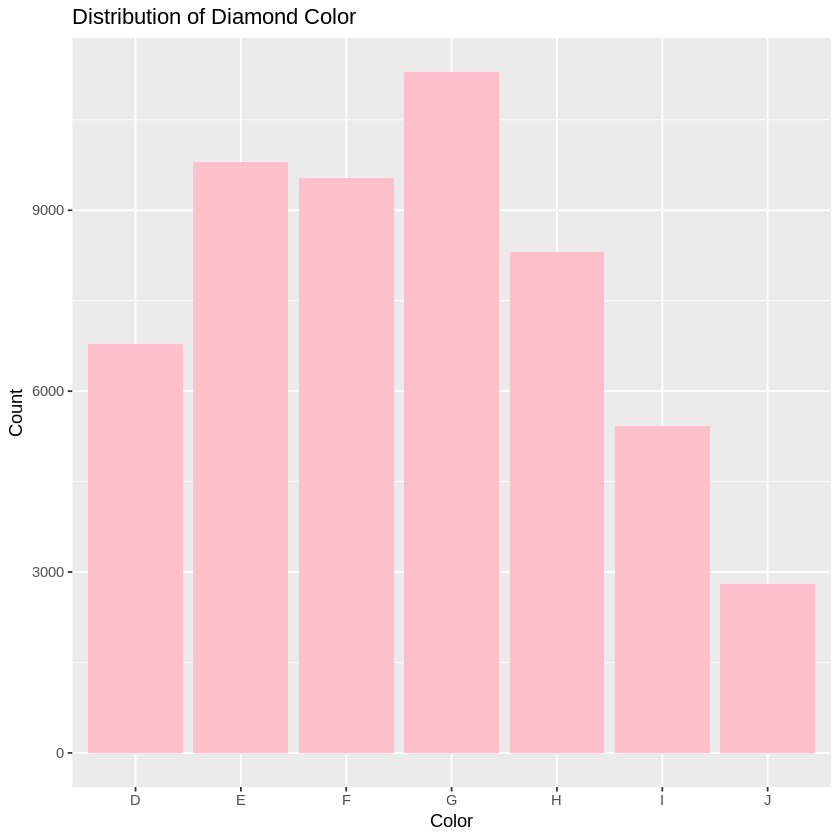

In [15]:
ggplot(diamonds, aes(x = price)) +
  geom_histogram(binwidth = 500, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Diamond Prices", x = "Price", y = "Frequency")

ggplot(diamonds, aes(x = carat)) +
  geom_histogram(binwidth = 0.1, fill = "tomato", color = "black") +
  labs(title = "Histogram of Diamond Carat", x = "Carat", y = "Frequency")

ggplot(diamonds, aes(x = cut)) +
  geom_bar(fill = "lightgreen") +
  labs(title = "Distribution of Diamond Cut", x = "Cut", y = "Count")

ggplot(diamonds, aes(x = color)) +
  geom_bar(fill = "pink") +
  labs(title = "Distribution of Diamond Color", x = "Color", y = "Count")

### b) Consider one of continuous attributes, and compute central and variational measures.

In [16]:
price = diamonds$price
price_mean = mean(price)
price_median = median(price)
price_range = range(price)
price_variance = var(price)
price_sd = sd(price)
price_IQR = IQR(price)

cat("Central Measures for Price: \nMean:", price_mean,
    "\nMedian:", price_median,
    "\n\nVariational Measures for Price: \nRange:",
    price_range[1], "to", price_range[2],
    "\nVariance:", price_variance,
    "\nStandard Deviation:", price_sd,
    "\nIQR:", price_IQR)

Central Measures for Price: 
Mean: 3932.8 
Median: 2401 

Variational Measures for Price: 
Range: 326 to 18823 
Variance: 15915629 
Standard Deviation: 3989.44 
IQR: 4374.25

### c) For a particular variable of the dataset, use Chebyshev's rule, and propose one-sigma interval. Based on your proposed interval, specify the outliers if any.

In [17]:
lower_bound = price_mean - price_sd
upper_bound = price_mean + price_sd
cat("One-sigma interval (Mean ± SD): [", lower_bound, ",", upper_bound, "]\n")

price_outliers = diamonds[diamonds$price < lower_bound
                          | diamonds$price > upper_bound, ]
cat("Number of outliers:", nrow(price_outliers), "\n")

One-sigma interval (Mean ± SD): [ -56.64002 , 7922.239 ]
Number of outliers: 7715 


### d) Explain how the box-plot technique can be used to detect outliers. Apply this technique for one attribute of the dataset.

Outliers detected using the boxplot method: 3540 


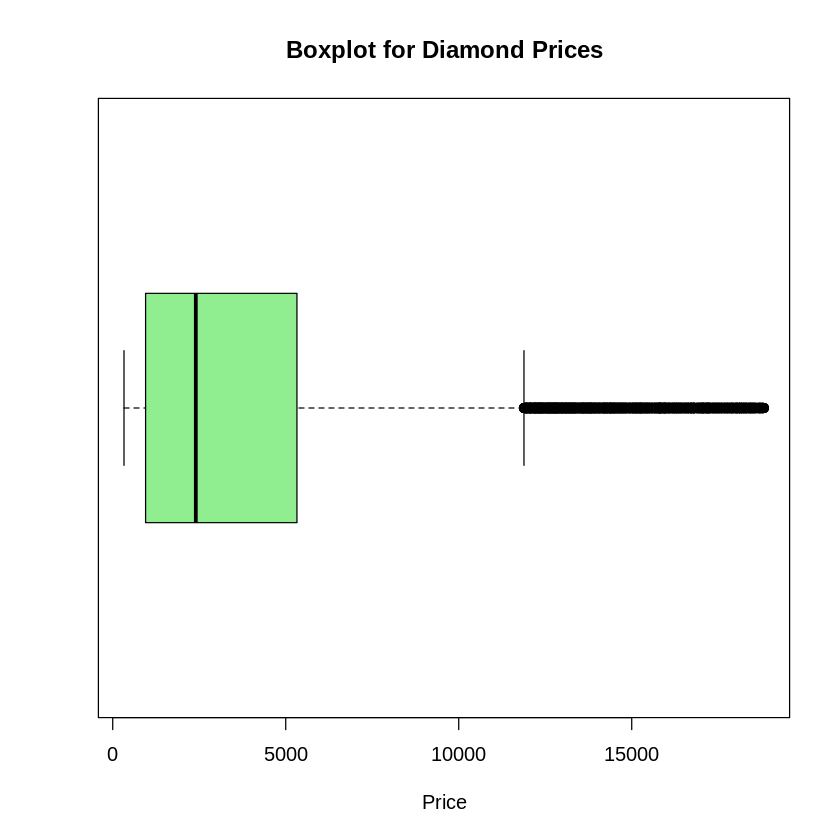

In [18]:
first_quartile = quantile(diamonds$price, 0.25)
third_quartile = quantile(diamonds$price, 0.75)
price_IQR = IQR(diamonds$price)

lower_limit = first_quartile - 1.5 * price_IQR
upper_limit = third_quartile + 1.5 * price_IQR

price_outlier_values = diamonds$price[diamonds$price < lower_limit |
                                        diamonds$price > upper_limit]
num_outliers = length(price_outlier_values)
if(num_outliers == 0) {
  cat("No outliers detected using the boxplot method.\n")
} else {
  cat("Outliers detected using the boxplot method:", num_outliers, "\n")
}

boxplot(diamonds$price,
        main = "Boxplot for Diamond Prices",
        col = "lightgreen",
        horizontal = TRUE,
        xlab = "Price")

## Question 2

### a) Select four variables of the dataset and propose an appropriate probability model to quantify uncertainty of each variable.

To quantify uncertainty in the dataset, we select two continuous - price, carat and two
categorical - cut, color variables.

Probability Model Selection:

Normal Distribution (For Continuous Variables - price, carat)
* The Normal distribution is commonly used to model continuous numerical
variables that vary around an average.
* Price and carat both exhibit natural variations, making the Normal distribution a
suitable choice for understanding their central tendency and dispersion.
* The Normal model helps in making statistical inferences and probability
estimations for these variables.


Multinomial Distribution (For Categorical Variables - cut, color)
* The Multinomial distribution is appropriate for categorical variables with multiple
distinct categories.
* Cut (Fair, Good, Very Good, Premium, Ideal) and color (D to J) both fall into this
category
* This model allows us to estimate the probability of each category occurring, helping
in uncertainty quantification for these attributes.

### b) For each model in part (a), estimate the parameters of model.

In [19]:
# Continuous Variables - Normal Model
price_mean = mean(diamonds$price)
price_sd = sd(diamonds$price)

carat_mean = mean(diamonds$carat)
carat_sd = sd(diamonds$carat)

cat(" Normal distribution parameters for Price:\n",
    "Mean:", price_mean, "\n", "SD:", price_sd, "\n\n",
    "Normal distribution parameters for Carat:\n",
    "Mean:", carat_mean, "\n", "SD:", carat_sd, "\n\n")

# Categorical Variables - Multinomial Model
cut_freq = table(diamonds$cut)
cut_prob = prop.table(cut_freq)

color_freq = table(diamonds$color)
color_prob = prop.table(color_freq)

cat("Estimated probabilities for Cut:\n"); print(cut_prob)
cat("\nEstimated probabilities for Color:\n"); print(color_prob)

 Normal distribution parameters for Price:
 Mean: 3932.8 
 SD: 3989.44 

 Normal distribution parameters for Carat:
 Mean: 0.7979397 
 SD: 0.4740112 

Estimated probabilities for Cut:

      Fair       Good  Very Good    Premium      Ideal 
0.02984798 0.09095291 0.22398962 0.25567297 0.39953652 

Estimated probabilities for Color:

         D          E          F          G          H          I          J 
0.12560252 0.18162773 0.17690026 0.20934372 0.15394883 0.10051910 0.05205784 


### c) Express the way in which each model can be used for the predictive analytics, then find the prediction for each attribute.

In [20]:
# Predictions for Continuous Variables
predicted_price = price_mean
predicted_carat = carat_mean
cat("Predicted Price (expected value):", predicted_price,
    "\nPredicted Carat (expected value):", predicted_carat, "\n\n")

# Predictions for Categorical Variables
predicted_cut = names(which.max(cut_prob))
predicted_color = names(which.max(color_prob))
cat("Predicted Cut (most common):", predicted_cut,
    "\nPredicted Color (most common):", predicted_color)

Predicted Price (expected value): 3932.8 
Predicted Carat (expected value): 0.7979397 

Predicted Cut (most common): Ideal 
Predicted Color (most common): G

## Question 3

### a) Consider two categorical variables of the dataset, develop a binary decision-making strategy to check whether two variables are independent at the significant level alpha=0.01.

Null Hypothesis (Hₒ): The variables Cut and Color are independent (no relationship between them).

Alternative Hypothesis (Hₐ): The variables Cut and Color are dependent (there is a relationship between them).

In [21]:
contingency_table = table(diamonds$cut, diamonds$color)
chi_test = chisq.test(contingency_table)

chi_stat = chi_test$statistic
df = chi_test$parameter

# critical value = qchisq(1 - alpha, df)
critical_value = qchisq(0.99, df)

cat("Chi-square Statistic:", chi_stat,
    "\nDegrees of Freedom:", df,
    "\nCritical Value (alpha = 0.01):", critical_value, "\n")

if (chi_stat > critical_value) {
  cat("Reject H₀: chi_stat =", round(chi_stat, 2),
      ">", round(critical_value, 2),
      "; Cut and Color are dependent.\n")
} else {
  cat("Fail to reject H₀: chi_stat =", round(chi_stat, 2),
      "<=", round(critical_value, 2),
      "; insufficient evidence of dependency.\n")
}

Chi-square Statistic: 310.3179 
Degrees of Freedom: 24 
Critical Value (alpha = 0.01): 42.97982 
Reject H₀: chi_stat = 310.32 > 42.98 ; Cut and Color are dependent.


### b) Consider one categorical variable, apply goodness of fit test to evaluate whether a candidate set of probabilities can be appropriate to quantify the uncertainty of class frequency at the significant level alpha=0.05.

The Goodness-of-Fit Test checks whether the observed distribution of a categorical variable (cut) follows an assumed probability distribution.

Null Hypothesis (Hₒ): The observed frequencies of cut follows the expected probabilities.

Alternative Hypothesis (Hₐ): They do not follow the expected probabilities.

In [22]:
observed = table(diamonds$cut)
n_levels = length(observed)
candidate_prob = rep(1/n_levels, n_levels)

gof = chisq.test(observed, p = candidate_prob)
gof_stat = gof$statistic
df = gof$parameter
critical_value = qchisq(0.95, df)

cat("Chi-square Statistic:", round(gof_stat, 2),
    "\nDegrees of Freedom:", df,
    "\nCritical Value (alpha = 0.05):", round(critical_value, 2), "\n")

if (gof_stat > critical_value) {
  cat("Reject H₀: gof_stat =", round(gof_stat, 2),
      ">", round(critical_value, 2),
      "; the candidate probabilities do not fit the data.\n")
} else {
  cat("Fail to reject H₀: gof_stat =", round(gof_stat, 2),
      "<=", round(critical_value, 2),
      "; the candidate probabilities are appropriate.\n")
}

Chi-square Statistic: 22744.55 
Degrees of Freedom: 4 
Critical Value (alpha = 0.05): 9.49 
Reject H₀: gof_stat = 22744.55 > 9.49 ; the candidate probabilities do not fit the data.


### c) Consider one continuous variable in the dataset and apply test of mean for a proposed candidate of μ at the significant level alpha=0.05.

The one-sample T-test checks whether the mean price of diamonds is significantly different from a proposed value (𝜇 =4000).

Null Hypothesis (Hₒ): The mean price of diamonds is 4000 (𝜇 = 4000).

Alternative Hypothesis (Hₐ): The mean price of diamonds is not 4000 (𝜇 ≠ 4000)

In [23]:
candidate_mean = 4000
t_test_result = t.test(diamonds$price, mu = candidate_mean)

t_stat = t_test_result$statistic
df = t_test_result$parameter
critical_value = qt(0.975, df)

cat("T-statistic:", round(t_stat, 2),
    "\nDegrees of Freedom:", df,
    "\nCritical Value (alpha = 0.05):", round(critical_value, 2), "\n\n")

if (abs(t_stat) > critical_value) {
  cat("Reject H₀: |t_stat| =", round(abs(t_stat), 2),
      ">", round(critical_value, 2),
      "; significant evidence that the mean is not", candidate_mean, "\n")
} else {
  cat("Fail to reject H₀: |t_stat| =", round(abs(t_stat), 2),
      "<=", round(critical_value, 2),
      "; insufficient evidence to conclude the mean differs from",
      candidate_mean, "\n")
}

T-statistic: -3.91 
Degrees of Freedom: 53939 
Critical Value (alpha = 0.05): 1.96 

Reject H₀: |t_stat| = 3.91 > 1.96 ; significant evidence that the mean is not 4000 
